In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [5]:
import operator
from statsmodels.distributions.empirical_distribution import ECDF

In [6]:
df = pd.read_csv("results.csv")

# Difference in Average Quality

In [8]:
Algorithms = ["HASBRAIN", 'KLUDCP', 'TRDA']

cmap = plt.get_cmap('copper')

data = {}
for alg in Algorithms:
    temp = df[df['Used_Algorithm'].str.contains(alg)]
    data[alg] = list(map(operator.sub, temp['sim_avg_quality'], temp['opt_avg_quality']))

HASBRAIN: More than 0s avg. quality level: 0.87.
-> Maximum increase: 1.0
-> Maximum decrease: -1.3
KLUDCP: More than 0s avg. quality level: 1.00.
-> Maximum increase: 0.0
-> Maximum decrease: -0.4
TRDA: More than 0s avg. quality level: 0.00.
-> Maximum increase: -0.0
-> Maximum decrease: -1.0


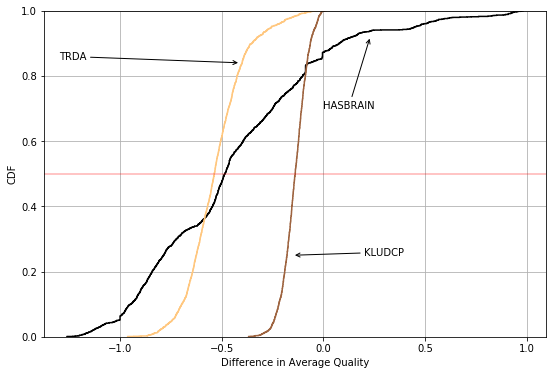

In [17]:
f = plt.figure(figsize=(9, 6))
ax = f.add_subplot(111)
    
colors = iter(cmap(np.linspace(0,1,len(Algorithms))))
    
for alg in Algorithms:

    temp = data[alg]
    ecdf = ECDF(temp)
    x = np.linspace(min(temp), max(temp))
    y = ecdf(x)
    ax.step(ecdf.x, ecdf.y, label=alg, color=next(colors))

ax.axhline(0.5, alpha=0.3, color="r")
ax.set_xlabel(r"Difference in Average Quality")
ax.set_ylabel("CDF")
ax.grid(True)

ax.set_xlim((-1.3735454123000004, 1.0957099542999997))
ax.set_ylim([0, 1])

plt.annotate(s='HASBRAIN', xy=(0.23,0.92), xytext=(0,0.7), arrowprops=dict(arrowstyle='->'))
plt.annotate(s='TRDA', xy=(-0.41,0.84), xytext=(-1.3,0.85), arrowprops=dict(arrowstyle='->'))
plt.annotate(s='KLUDCP', xy=(-0.15,0.25), xytext=(0.2,0.25), arrowprops=dict(arrowstyle='->'))

for alg in Algorithms:
    ecdf = ECDF(data[alg])
    print("%s: More than 0s avg. quality level: %.2f." % (alg, ecdf.y[np.argmax(ecdf.x > 0.0)]))
    print("-> Maximum increase: %.1f" % ecdf.x[-1])
    print("-> Maximum decrease: %.1f" % ecdf.x[1])

# Difference in Switching Frequency

HASBRAIN: More than 0 m^-1 switching frequency: 0.89.
-> Maximum increase: 0.3
-> Maximum decrease: -1.3
KLUDCP: More than 0 m^-1 switching frequency: 0.00.
-> Maximum increase: 21.4
-> Maximum decrease: 0.1
TRDA: More than 0 m^-1 switching frequency: 0.11.
-> Maximum increase: 3.5
-> Maximum decrease: -0.7


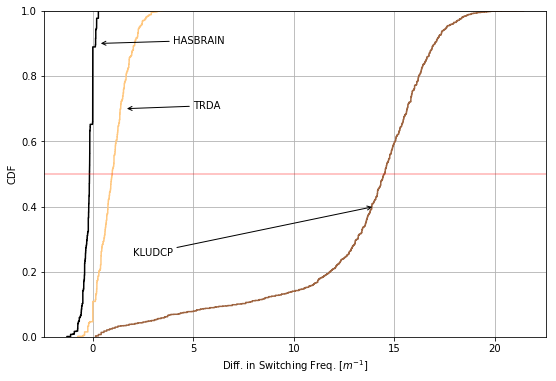

In [20]:
f = plt.figure(figsize=(9, 6))
ax = f.add_subplot(111)

colors = iter(cmap(np.linspace(0,1,len(Algorithms))))

data = {}
for alg in Algorithms:
    temp = df[df['Used_Algorithm'].str.contains(alg)]

    quality_switching_freq_sim = temp['sim_nr_of_switches']/((temp['sim_total_stalling_time']+temp['video_length'])/60)
    quality_switching_freq_op = temp['opt_nr_of_switches']/(temp['video_length']/60)

    data[alg] = list(map(operator.sub, quality_switching_freq_sim, quality_switching_freq_op))

for alg in Algorithms:

    temp = data[alg]
    ecdf = ECDF(temp)
    x = np.linspace(min(temp), max(temp))
    y = ecdf(x)
    ax.step(ecdf.x, ecdf.y, label=alg, color=next(colors))

ax.set_xlim(-2.4241893076248902, 22.564417177914109)
ax.axhline(0.5, alpha=0.3, color="r")
ax.set_xlabel(r"Diff. in Switching Freq. [$m^{-1}$]")
ax.set_ylabel("CDF")

ax.set_ylim([0, 1])
ax.grid(True)

plt.annotate(s='HASBRAIN', xy=(0.3,0.9), xytext=(4,0.9), arrowprops=dict(arrowstyle='->'))
plt.annotate(s='TRDA', xy=(1.6,0.7), xytext=(5,0.7), arrowprops=dict(arrowstyle='->'))
plt.annotate(s='KLUDCP', xy=(14,0.4), xytext=(2,0.25), arrowprops=dict(arrowstyle='->'))

for alg in Algorithms:
    ecdf = ECDF(data[alg])
    print("%s: More than 0 m^-1 switching frequency: %.2f." % (alg, ecdf.y[np.argmax(ecdf.x > 0.0)]))
    print("-> Maximum increase: %.1f" % ecdf.x[-1])
    print("-> Maximum decrease: %.1f" % ecdf.x[1])

# Stalling Frequency

HASBRAIN: Stalling more than 0.0: 0.73.
HASBRAIN: Stalling more than 0.5: 0.92.
HASBRAIN: Stalling more than 1.0: 0.95.


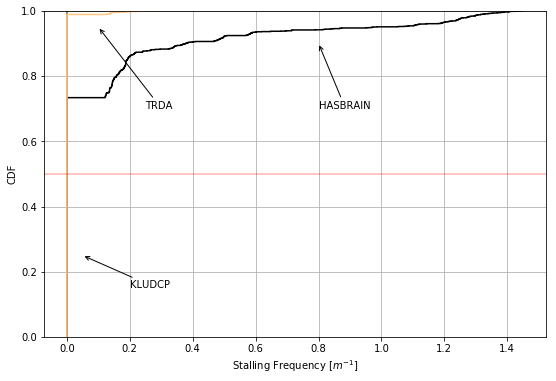

In [25]:
f = plt.figure(figsize=(9, 6))
ax = f.add_subplot(111)

colors = iter(cmap(np.linspace(0,1,len(Algorithms))))

data = {}
for alg in Algorithms:
    temp = df[df['Used_Algorithm'].str.contains(alg)]
    data[alg] = temp['sim_nr_of_stallings']/((temp['sim_total_stalling_time']+temp['video_length'])/60)

for alg in Algorithms:

    temp = data[alg]

    ecdf = ECDF(temp)
    x = np.linspace(min(temp), max(temp))
    y = ecdf(x)
    ax.step(ecdf.x, ecdf.y, label=alg, color=next(colors))

ax.axhline(0.5, alpha=0.3, color="r")
ax.set_xlabel(r"Stalling Frequency [$m^{-1}$]")
ax.set_ylabel("CDF")

ax.set_xlim(-0.072575660009438783, 1.5240888601982143)
ax.set_ylim([0, 1])
ax.grid(True)

plt.annotate(s='HASBRAIN', xy=(0.8,0.9), xytext=(0.8,0.7), arrowprops=dict(arrowstyle='->'))
plt.annotate(s='KLUDCP', xy=(0.05,0.25), xytext=(0.2,0.15), arrowprops=dict(arrowstyle='->'))
plt.annotate(s='TRDA', xy=(0.1,0.95), xytext=(0.25,0.7), arrowprops=dict(arrowstyle='->'))

ecdf = ECDF(data["HASBRAIN"])
for v in [0.0, 0.5, 1]:
    print("HASBRAIN: Stalling more than %.1f: %.2f." % (v, ecdf.y[np.argmax(ecdf.x > v)]))


# Stalling Ratio

Text(1.1,0.25,'KLUDCP / TRDA')

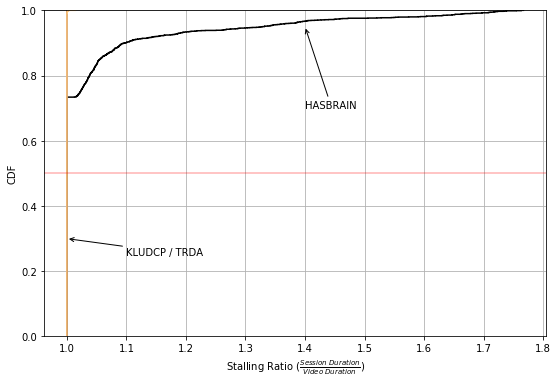

In [23]:
f = plt.figure(figsize=(9, 6))
ax = f.add_subplot(111)

colors = iter(cmap(np.linspace(0,1,len(Algorithms))))

for alg in Algorithms:

    if alg == 'HASBRAIN':
        temp = df[df['Used_Algorithm'].str.contains("HASBRAIN")]
    elif alg == 'KLUDCP':
        temp = df[df['Used_Algorithm'].str.contains("KLUDCP")]
    elif alg == 'TRDA':
        temp = df[df['Used_Algorithm'].str.contains("TRDA")]

    temp = (temp['sim_total_stalling_time']+temp['video_length'])/temp['video_length']
    ecdf = ECDF(temp)
    x = np.linspace(min(temp), max(temp))
    y = ecdf(x)
    ax.step(ecdf.x, ecdf.y, label=alg, color=next(colors))

ax.axhline(0.5, alpha=0.3, color="r")
ax.set_xlabel(r"Stalling Ratio ($\frac{Session\ Duration}{Video\ Duration}$)")
ax.set_ylabel("CDF")

ax.set_xlim(0.96165177117768597, 1.8053128052685952)
ax.set_ylim([0, 1])
ax.grid(True)

plt.annotate(s='HASBRAIN', xy=(1.4,0.95), xytext=(1.4,0.7), arrowprops=dict(arrowstyle='->'))
plt.annotate(s='KLUDCP / TRDA', xy=(1,0.3), xytext=(1.1,0.25), arrowprops=dict(arrowstyle='->'))
#plt.annotate(s='TRDA', xy=(0.2,37), xytext=(0.1,18), arrowprops=dict(arrowstyle='->'))

